# Analyse Exploratoire

### Import des modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

### Analyse Exploratoire

In [2]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")
building_consumption.shape

(3376, 46)

In [3]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [4]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [5]:
building_consumption.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 

In [6]:
# On repère les colonnes avec de nombreuses valeurs manquantes
missing_values = building_consumption.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False)

Comments                           3376
Outlier                            3344
YearsENERGYSTARCertified           3257
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ENERGYSTARScore                     843
LargestPropertyUseTypeGFA            20
LargestPropertyUseType               20
ZipCode                              16
ListOfAllPropertyUseTypes             9
NaturalGas(kBtu)                      9
SourceEUI(kBtu/sf)                    9
Electricity(kBtu)                     9
Electricity(kWh)                      9
SteamUse(kBtu)                        9
SourceEUIWN(kBtu/sf)                  9
TotalGHGEmissions                     9
NaturalGas(therms)                    9
GHGEmissionsIntensity                 9
NumberofBuildings                     8
SiteEUI(kBtu/sf)                      7
SiteEUIWN(kBtu/sf)                    6
SiteEnergyUseWN(kBtu)                 6


In [7]:
building_consumption.shape

(3376, 46)

In [8]:
# On sépare les colonnes numeriques et qualitatives puis on fait l'analyse colonne par colonne
num_cols = building_consumption.select_dtypes(include=['float64', 'int64']).columns
cat_cols = building_consumption.select_dtypes(include=['object']).columns


print("=== Colonnes numériques ===")
for col in num_cols:
    print(f"\nColonne: {col}")
    print("Type:", building_consumption[col].dtype)
    print("Valeurs manquantes:", building_consumption[col].isna().sum())
    print("Valeurs uniques:", building_consumption[col].nunique())
    print("Statistiques descriptives:")
    print(building_consumption[col].describe())


print("\n=== Colonnes catégorielles ===")
for col in cat_cols:
    print(f"\nColonne: {col}")
    print("Type:", building_consumption[col].dtype)
    print("Valeurs manquantes:", building_consumption[col].isna().sum())
    print("Nombre de valeurs uniques:", building_consumption[col].nunique())
    print("Top 5 valeurs les plus fréquentes:")
    print(building_consumption[col].value_counts().head(5))

=== Colonnes numériques ===

Colonne: OSEBuildingID
Type: int64
Valeurs manquantes: 0
Valeurs uniques: 3376
Statistiques descriptives:
count     3376.000000
mean     21208.991114
std      12223.757015
min          1.000000
25%      19990.750000
50%      23112.000000
75%      25994.250000
max      50226.000000
Name: OSEBuildingID, dtype: float64

Colonne: DataYear
Type: int64
Valeurs manquantes: 0
Valeurs uniques: 1
Statistiques descriptives:
count    3376.0
mean     2016.0
std         0.0
min      2016.0
25%      2016.0
50%      2016.0
75%      2016.0
max      2016.0
Name: DataYear, dtype: float64

Colonne: ZipCode
Type: float64
Valeurs manquantes: 16
Valeurs uniques: 55
Statistiques descriptives:
count     3360.000000
mean     98116.949107
std         18.615205
min      98006.000000
25%      98105.000000
50%      98115.000000
75%      98122.000000
max      98272.000000
Name: ZipCode, dtype: float64

Colonne: CouncilDistrictCode
Type: int64
Valeurs manquantes: 0
Valeurs uniques: 7
Stat

In [9]:
building_consumption.ListOfAllPropertyUseTypes.unique()
building_consumption.ThirdLargestPropertyUseType.unique()
building_consumption.City.unique()
building_consumption.ZipCode.unique()
building_consumption.CouncilDistrictCode.unique()
building_consumption.Neighborhood.unique()
building_consumption.NumberofBuildings.unique()
building_consumption.NumberofFloors.unique()
building_consumption.Comments.unique()
building_consumption.DefaultData.unique()
building_consumption.BuildingType.unique()
building_consumption.LargestPropertyUseType.unique()
building_consumption.ComplianceStatus.unique()
building_consumption.Neighborhood.unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [10]:
# On enleve les batiments residentiels
residential_building_types = [
    'Multifamily MR (5-9)',
    'Multifamily LR (1-4)',
    'Multifamily HR (10+)'
]
building_consumption = building_consumption[~building_consumption['BuildingType'].isin(residential_building_types)]
building_consumption = building_consumption[(building_consumption['PrimaryPropertyType']!='Senior Care Community') |
                                            (building_consumption['PrimaryPropertyType']!='Residence Hall') |
                                            (building_consumption['PrimaryPropertyType']!='Low-Rise Multifamily')]




In [11]:
building_consumption.SecondLargestPropertyUseType.unique()

array([nan, 'Parking', 'Office', 'Restaurant', 'K-12 School',
       'Laboratory', 'Refrigerated Warehouse',
       'Non-Refrigerated Warehouse', 'Other - Education',
       'Vocational School', 'Retail Store',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Entertainment/Public Assembly', 'Data Center',
       'Swimming Pool', 'Other', 'Courthouse', 'Residence Hall/Dormitory',
       'Distribution Center', 'Self-Storage Facility', 'Other - Services',
       'Movie Theater', 'Supermarket/Grocery Store', 'Medical Office',
       'Other - Recreation', 'Convenience Store without Gas Station',
       'Performing Arts', 'College/University', 'Other - Restaurant/Bar',
       'Adult Education', 'Enclosed Mall', 'Multifamily Housing',
       'Bar/Nightclub', 'Financial Office',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Manufacturing/Industrial Plant', 'Other - Lodging/Residential',
       'Bank Branch', 'Fitness Center/Health Club/Gym', 'H

In [12]:
building_consumption = building_consumption[building_consumption['DefaultData'] != True]
building_consumption = building_consumption[building_consumption['Outlier'].isna()]
building_consumption = building_consumption[building_consumption['NumberofBuildings']==1]


# on drop les colonnes inutiles ou avec de nombreuse valeurs manquantes
building_consumption.drop(columns=[ 'OSEBuildingID', #inutile
                                    'State', #une seule valeur
                                    'City', #une seule valeur
                                    'Address', #inutile
                                    'ZipCode', #inutile, on va cependant garder les quartiers
                                    'DataYear', #une seule valeur
                                    'PropertyName', #inutile
                                    'TaxParcelIdentificationNumber', #inutile
                                    'ThirdLargestPropertyUseType',  #trop de valeurs manquantes  
                                    'Comments', #inutile
                                    'DefaultData', #inutile
                                    'Outlier', #une seule valeur
                                    'NumberofBuildings', #une seule valeur
                                    'PropertyGFAParking', #on va recupérer le pourcentage d'espace total pris par le batiment donc inutile
                                    ], inplace=True)   

building_consumption.shape

(1459, 32)

##### Targets : TotalGHGEmissions et SiteEnergyUse(kBtu)

##### On enlève les données non structurelles apres aovir cree de nouvelles colonnes

In [13]:
building_consumption['IsUsingNaturalGas'] = building_consumption['NaturalGas(kBtu)'].apply(
    lambda x: 1 if x > 0 else 0
)

building_consumption['IsUsingSteam'] = building_consumption['SteamUse(kBtu)'].apply(
    lambda x: 1 if x > 0 else 0
)

In [14]:
#on enlève les colonnes non structurelles
building_consumption.drop(columns=[ 'SiteEUIWN(kBtu/sf)',
                                    'SourceEUIWN(kBtu/sf)',
                                    'SiteEnergyUseWN(kBtu)',
                                    'NaturalGas(therms)',
                                    'Electricity(kWh)',
                                    'YearsENERGYSTARCertified', 
                                    'NaturalGas(kBtu)',
                                    'SiteEUI(kBtu/sf)',
                                    'ENERGYSTARScore',
                                    'SteamUse(kBtu)',
                                    'Electricity(kBtu)',
                                    'GHGEmissionsIntensity',
                                    'SourceEUI(kBtu/sf)'
                                    ], inplace=True)  
building_consumption.shape

(1459, 21)

In [15]:
# On filtre du 5e au 95 percentile
q_low = building_consumption['TotalGHGEmissions'].quantile(0.05)
q_high = building_consumption['TotalGHGEmissions'].quantile(0.95)

building_consumption = building_consumption[
    (building_consumption['TotalGHGEmissions'] >= q_low) &
    (building_consumption['TotalGHGEmissions'] <= q_high)
]

q_low = building_consumption['SiteEnergyUse(kBtu)'].quantile(0.05)
q_high = building_consumption['SiteEnergyUse(kBtu)'].quantile(0.95)

building_consumption = building_consumption[
    (building_consumption['SiteEnergyUse(kBtu)'] >= q_low) &
    (building_consumption['SiteEnergyUse(kBtu)'] <= q_high)
]



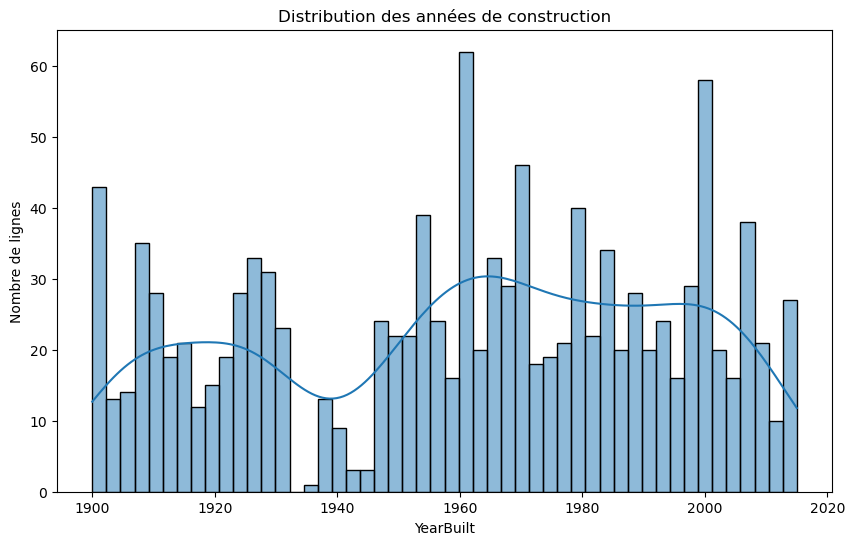

In [16]:
# Distribution des annees de construction
plt.figure(figsize=(10,6))
sns.histplot(building_consumption['YearBuilt'].dropna(), bins=50, kde=True)
plt.title('Distribution des années de construction')
plt.xlabel('YearBuilt')
plt.ylabel('Nombre de lignes')
plt.show()

# Modélisation 

### Import des modules 

In [17]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

In [18]:
# CODE FEATURE ENGINEERING

In [19]:
building_consumption["NumUseTypes"] = (
    building_consumption["ListOfAllPropertyUseTypes"]
        .fillna("")                     # éviter erreurs si NaN
        .apply(lambda x: len([t for t in x.split(",") if t.strip() != ""]))
)

C:\Users\teoco\AppData\Local\Temp\ipykernel_44512\2164724099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


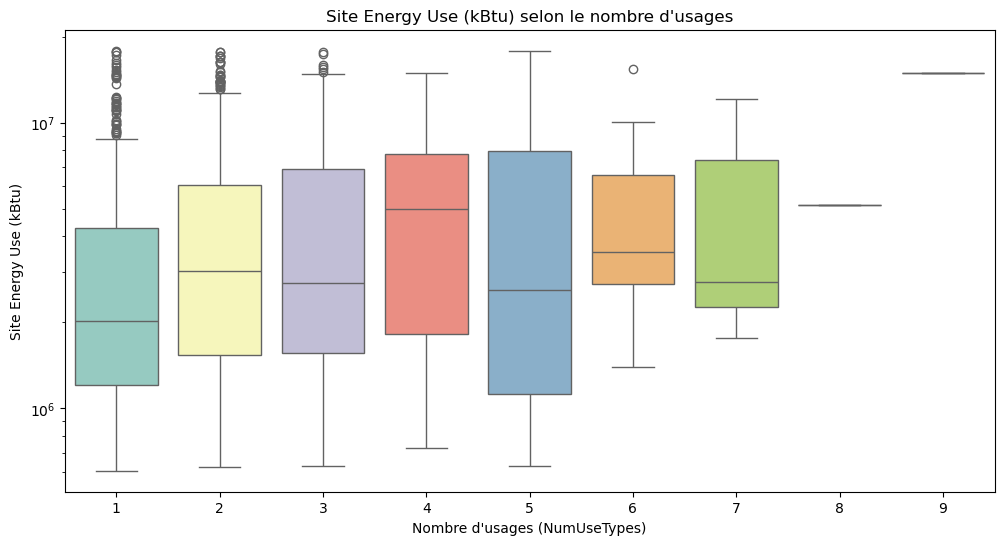

C:\Users\teoco\AppData\Local\Temp\ipykernel_44512\2164724099.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


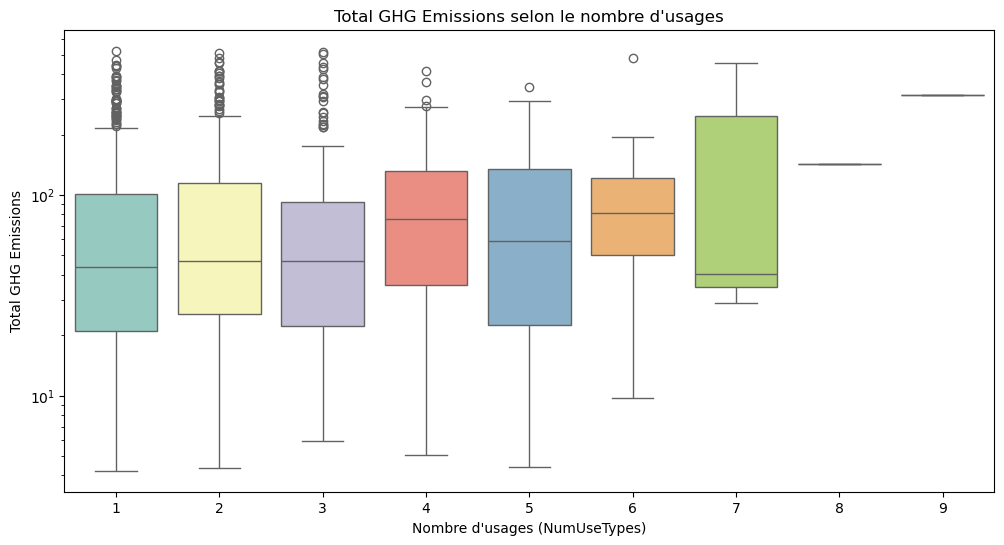

In [20]:
# Boxplot pour SiteEnergyUse par nombre d'usages
plt.figure(figsize=(12,6))
sns.boxplot(
    x='NumUseTypes', 
    y='SiteEnergyUse(kBtu)', 
    data=building_consumption,
    palette='Set3'
)
plt.title('Site Energy Use (kBtu) selon le nombre d\'usages')
plt.yscale('log')  # utile pour visualiser les outliers
plt.ylabel('Site Energy Use (kBtu)')
plt.xlabel('Nombre d\'usages (NumUseTypes)')
plt.show()

# Boxplot pour TotalGHGEmissions par nombre d'usages
plt.figure(figsize=(12,6))
sns.boxplot(
    x='NumUseTypes', 
    y='TotalGHGEmissions', 
    data=building_consumption,
    palette='Set3'
)
plt.title('Total GHG Emissions selon le nombre d\'usages')
plt.yscale('log')  # utile pour visualiser les outliers
plt.ylabel('Total GHG Emissions')
plt.xlabel('Nombre d\'usages (NumUseTypes)')
plt.show()

In [21]:
#On crée une colonne pour le pourcentage d'espace utilisé par les batiments
building_consumption['FractionGFABuilding'] = (
    building_consumption['PropertyGFABuilding(s)'] / building_consumption['PropertyGFATotal']
)

#On crée une colonne pour le pourcentage d'espace utilisé par le type principal
building_consumption['FractionLargestPropertyUseTypeGFA'] = (
    building_consumption['LargestPropertyUseTypeGFA'] / building_consumption['PropertyGFATotal']
)

#On crée une colonne pour la distance jusqu'au centre ville de seattle
# Coordonnées centre ville
seattle_center_lat = 47.6062
seattle_center_lon = -122.3321

# on convertit les degres en radians
lat1 = np.radians(building_consumption['Latitude'])
lon1 = np.radians(building_consumption['Longitude'])
lat2 = np.radians(seattle_center_lat)
lon2 = np.radians(seattle_center_lon)

# Haversine
dlat = lat2 - lat1
dlon = lon2 - lon1
a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
c = 2 * np.arcsin(np.sqrt(a))
r = 6371  
building_consumption['DistanceToSeattleCenter_km'] = c * r

In [22]:
building_consumption.drop(columns=['PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes','LargestPropertyUseType',
                                    'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
                                    'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'], inplace=True)

In [23]:
building_consumption.drop(columns=["PrimaryPropertyType","Neighborhood"], inplace=True)

In [24]:
building_consumption["ComplianceStatus"].value_counts()

ComplianceStatus
Compliant    1181
Name: count, dtype: int64

In [25]:
building_consumption.drop(columns=["ComplianceStatus", "BuildingType"], inplace=True)

In [26]:
building_consumption.dropna(inplace=True)
building_consumption.isna().sum()

CouncilDistrictCode                  0
Latitude                             0
Longitude                            0
YearBuilt                            0
NumberofFloors                       0
PropertyGFATotal                     0
SiteEnergyUse(kBtu)                  0
TotalGHGEmissions                    0
IsUsingNaturalGas                    0
IsUsingSteam                         0
NumUseTypes                          0
FractionGFABuilding                  0
FractionLargestPropertyUseTypeGFA    0
DistanceToSeattleCenter_km           0
dtype: int64

In [27]:

building_consumption.columns

Index(['CouncilDistrictCode', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofFloors', 'PropertyGFATotal', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'IsUsingNaturalGas', 'IsUsingSteam', 'NumUseTypes',
       'FractionGFABuilding', 'FractionLargestPropertyUseTypeGFA',
       'DistanceToSeattleCenter_km'],
      dtype='object')

In [28]:
building_consumption.shape

(1178, 14)

In [29]:
num_cols = building_consumption.select_dtypes(include=['float64', 'int64']).columns

pearson_corr = building_consumption[num_cols].corr(method='pearson')

spearman_corr = building_consumption[num_cols].corr(method='spearman')

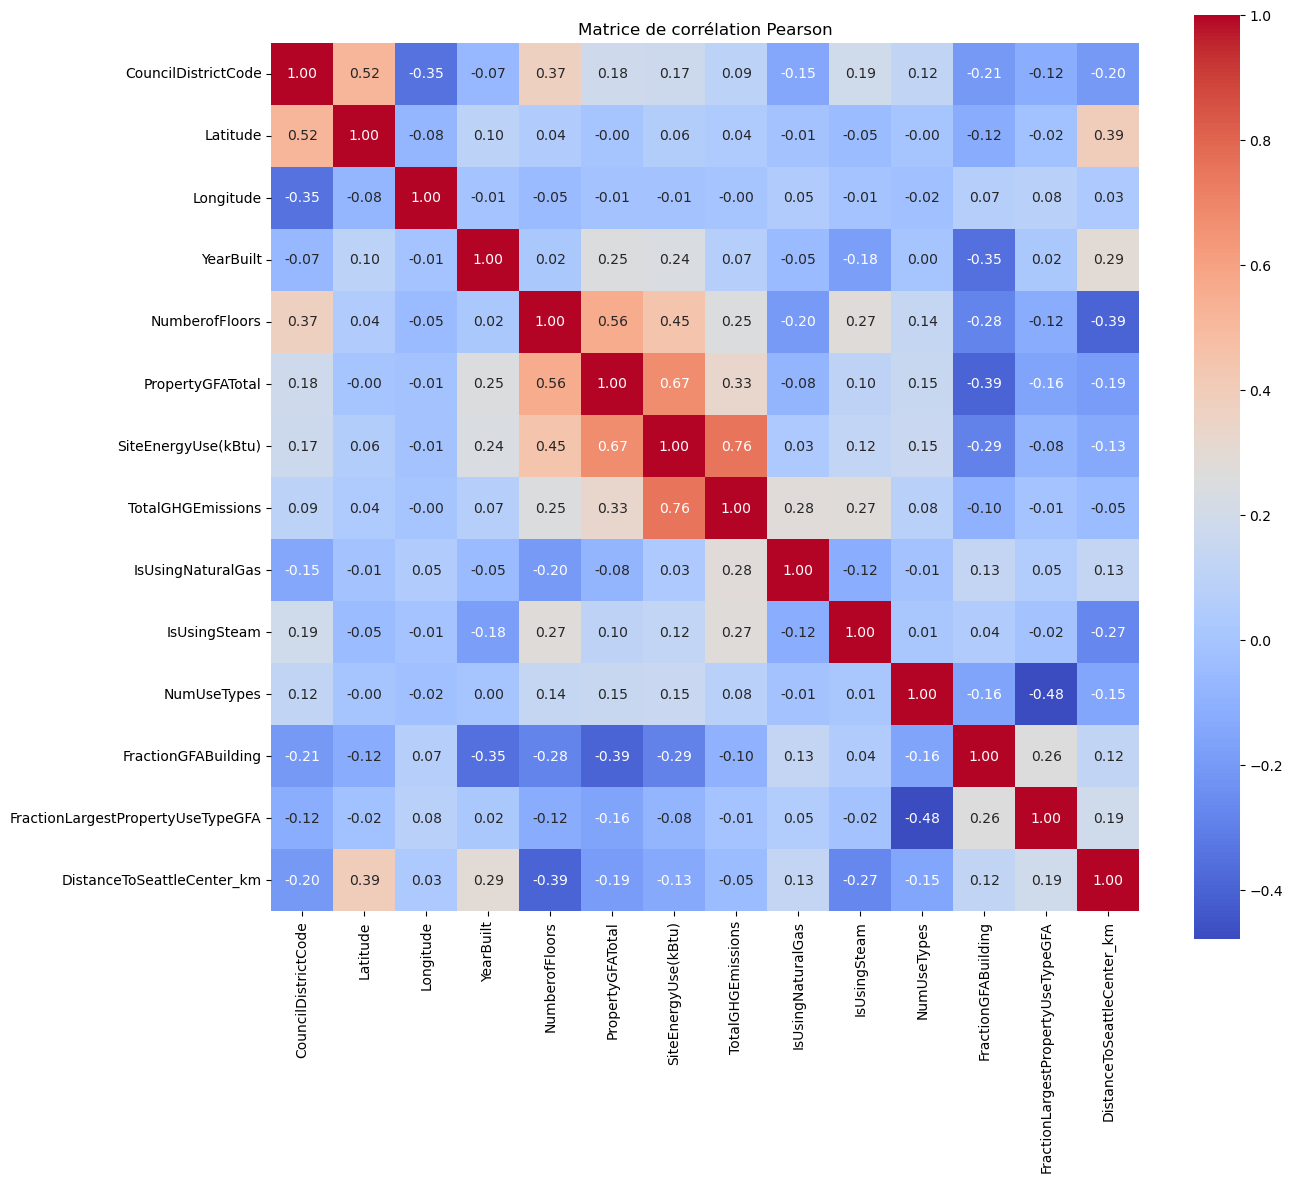

In [30]:
plt.figure(figsize=(14,12))
sns.heatmap(
    pearson_corr, 
    annot=True,  # affiche les valeurs
    fmt=".2f", 
    cmap='coolwarm', 
    cbar=True,
    square=True
)
plt.title('Matrice de corrélation Pearson')
plt.show()

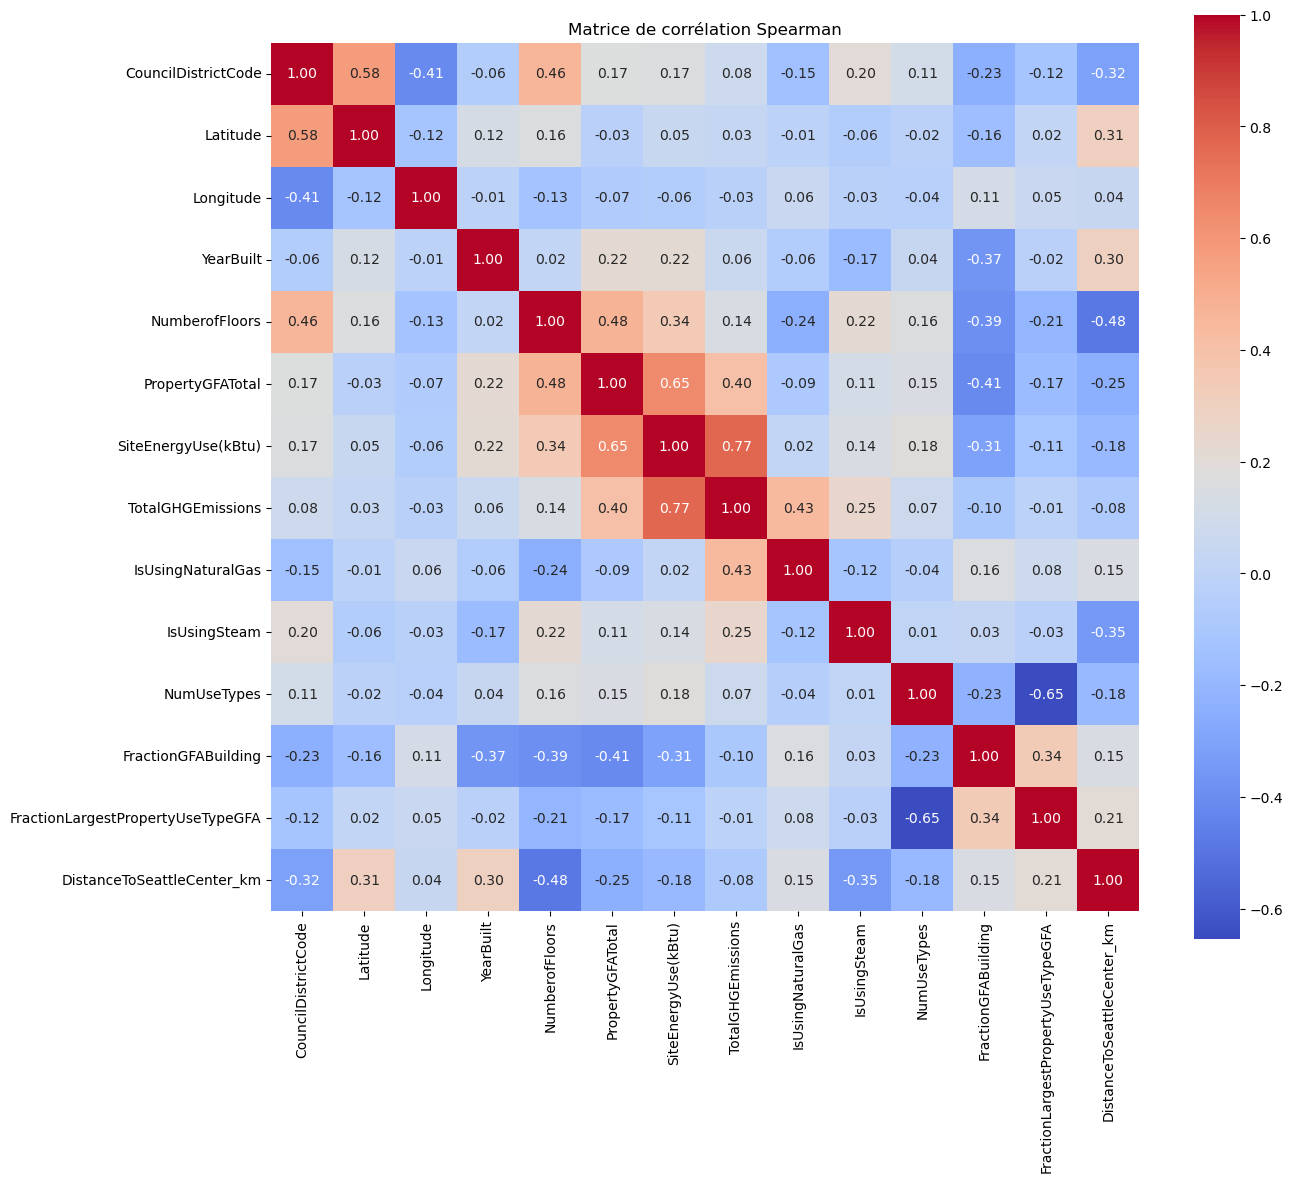

In [31]:
plt.figure(figsize=(14,12))
sns.heatmap(
    spearman_corr, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    cbar=True,
    square=True
)
plt.title('Matrice de corrélation Spearman')
plt.show()

<Figure size 1500x4000 with 0 Axes>

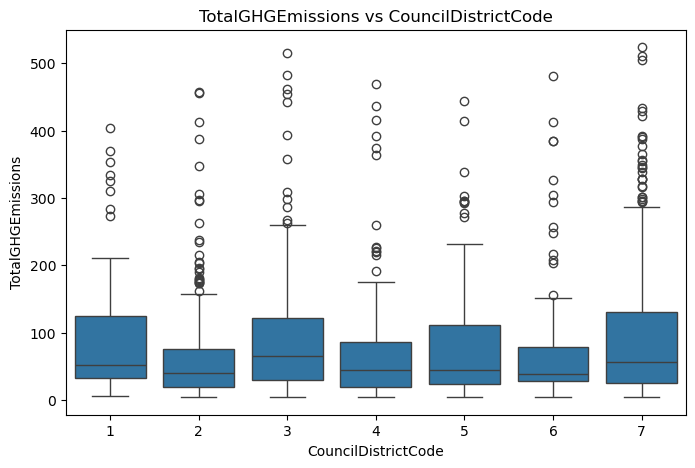

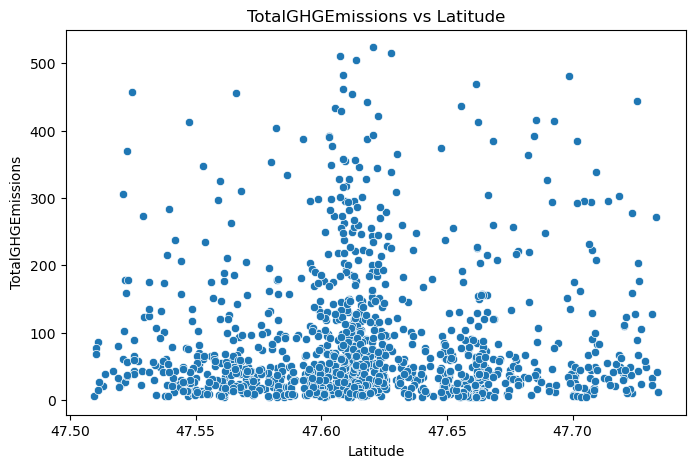

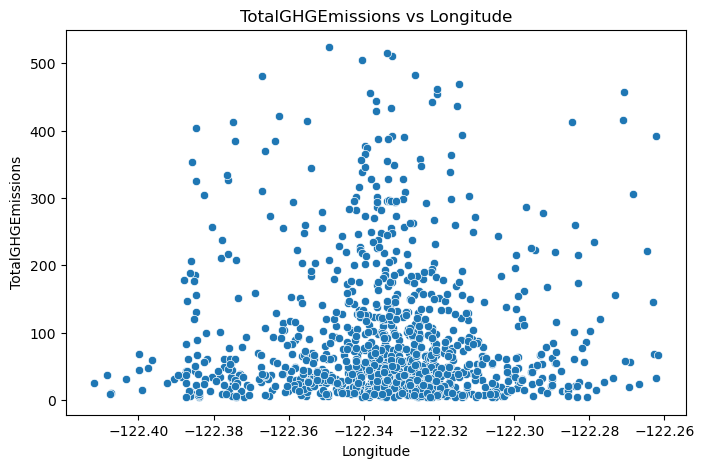

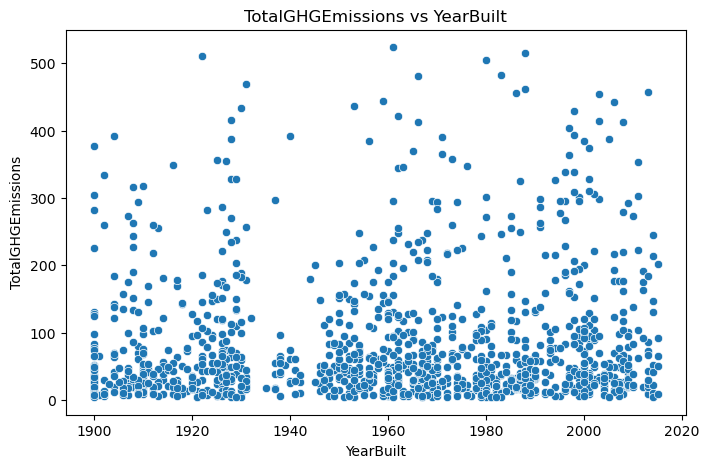

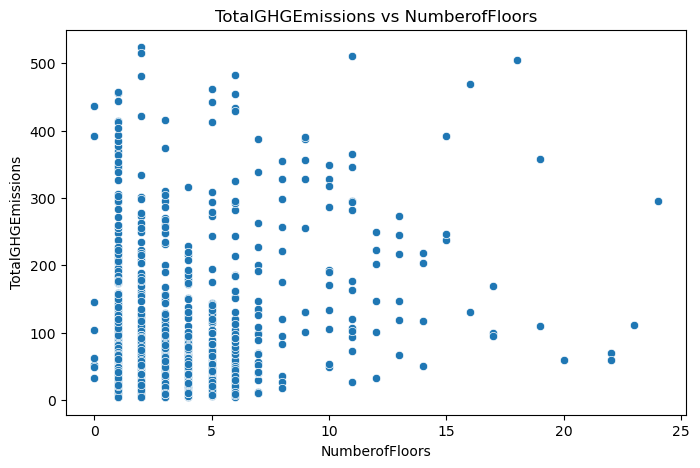

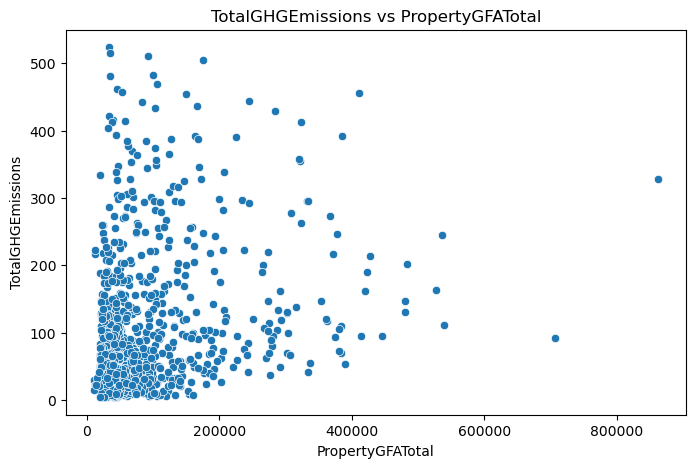

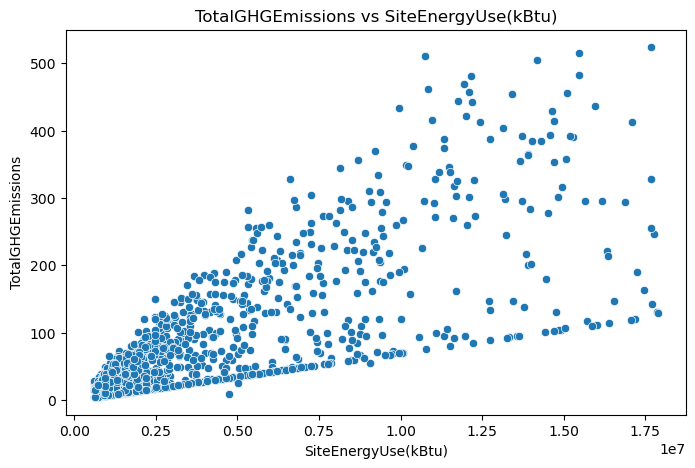

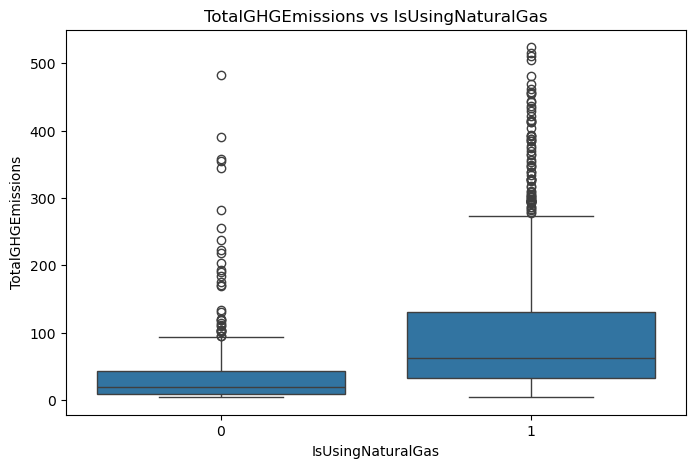

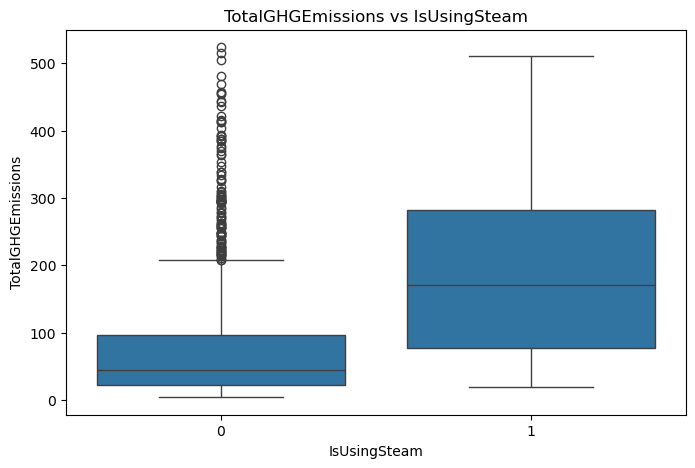

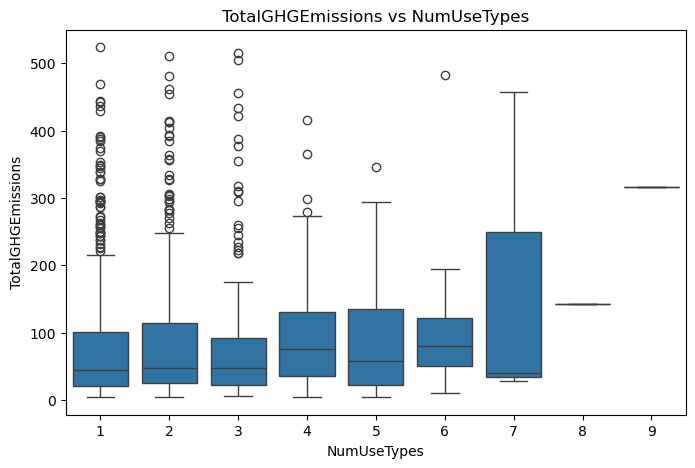

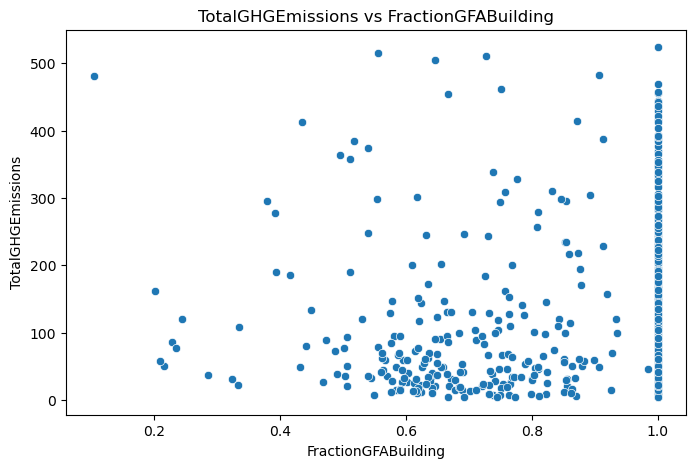

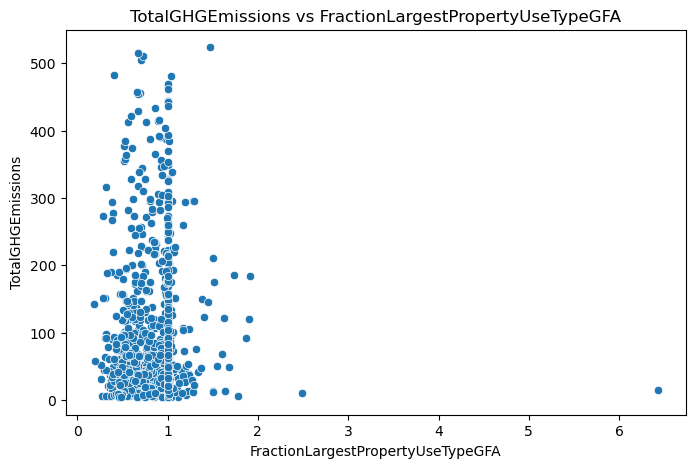

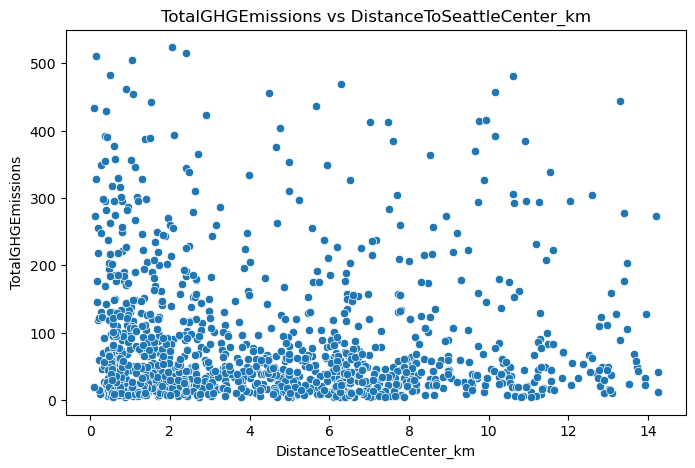

In [32]:
target = 'TotalGHGEmissions'
features = ['CouncilDistrictCode', 'Latitude', 'Longitude', 'YearBuilt',
            'NumberofFloors', 'PropertyGFATotal', 'SiteEnergyUse(kBtu)',
            'IsUsingNaturalGas', 'IsUsingSteam', 'NumUseTypes',
            'FractionGFABuilding', 'FractionLargestPropertyUseTypeGFA',
            'DistanceToSeattleCenter_km']

plt.figure(figsize=(15, 40))

for feature in features:
    plt.figure(figsize=(8, 5))
    
    if building_consumption[feature].dtype == 'object' or len(building_consumption[feature].unique()) < 10:
        # Categorical or binary features
        sns.boxplot(x=feature, y=target, data=building_consumption)
    else:
        # Continuous features
        sns.scatterplot(x=feature, y=target, data=building_consumption)
    
    plt.title(f'{target} vs {feature}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

In [46]:
building_consumption.shape

(1178, 14)

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

In [33]:
# CODE PREPARATION DES FEATURES

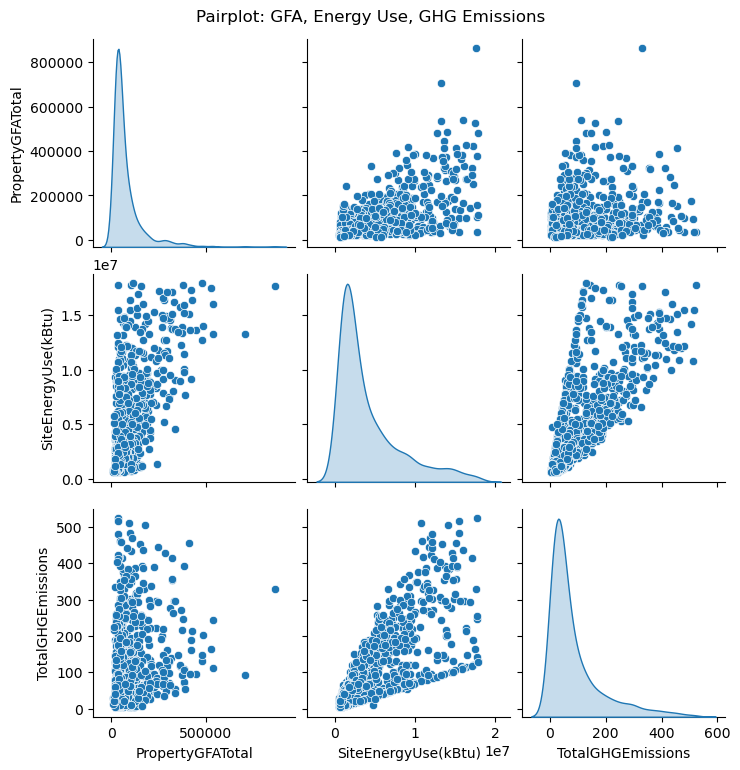

In [34]:
# Sélection des colonnes d'intérêt
cols_of_interest = ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

# Pairplot avec KDE pour les distributions
sns.pairplot(building_consumption[cols_of_interest], diag_kind='kde')
plt.suptitle('Pairplot: GFA, Energy Use, GHG Emissions', y=1.02)
plt.show()

#### On sépare les targets du dataset en les passant en log

In [35]:
target_energy = "SiteEnergyUse(kBtu)"
target_ghg = "TotalGHGEmissions"

X = building_consumption.drop(columns=[target_energy, target_ghg])
y_energy = np.log1p(building_consumption[target_energy])
y_ghg = np.log1p(building_consumption[target_ghg])

# Split identique pour toutes les modélisations
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(
    X, y_energy, test_size=0.2, random_state=42
)

X_train_ghg, X_test_ghg, y_train_ghg, y_test_ghg = train_test_split(
    X, y_ghg, test_size=0.2, random_state=42
)

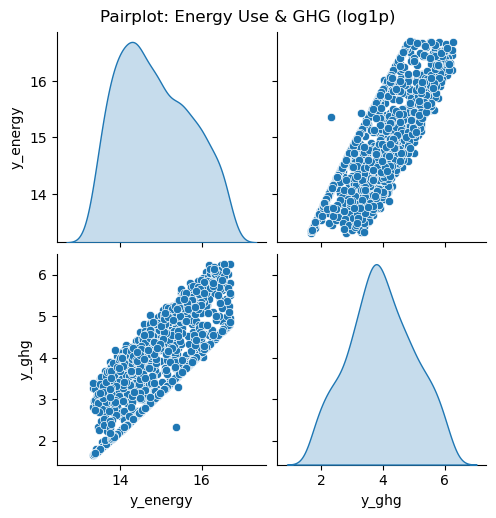

In [36]:
df_targets = pd.DataFrame({
    "y_energy": y_energy,
    "y_ghg": y_ghg
})

sns.pairplot(df_targets, diag_kind="kde")
plt.suptitle("Pairplot: Energy Use & GHG (log1p)", y=1.02)
plt.show()

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [37]:
import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-8))) * 100

# Scorers pour cross_validate
scoring = {
    "r2": "r2",
    "mae": "neg_mean_absolute_error",
    "rmse": "neg_root_mean_squared_error",
    "mape": make_scorer(mape, greater_is_better=False)
}

def evaluate_model(model, X, y, cv=10):
    """
    Entraîne un modèle avec cross_validate et renvoie les performances moyennes.
    """
    y_pred_log = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y)
    return {
        "Model": model.__class__.__name__,
        "R2 (cv mean)": r2_score(y_true, y_pred),
        "MAE (cv mean)": mean_absolute_error(y_true, y_pred),
        "RMSE (cv mean)": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAPE (cv mean)": mape(y_true, y_pred)
    }

def evaluate_models_for_target(models, X, y, target_name):
    results = []
    for model in models:
        print(f"Evaluating {model.__class__.__name__} for {target_name}...")
        results.append(evaluate_model(model, X, y))
    df_results = pd.DataFrame(results).sort_values("MAPE (cv mean)")
    print(f"=== Results for {target_name}")
    display(df_results)
    return df_results

# Liste des modèles
models = [
    DummyRegressor(strategy="mean"),
    LinearRegression(),
    SVR(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    lgb.LGBMRegressor(n_estimators=100, random_state=42)
]

# Évaluation
df_energy = evaluate_models_for_target(models, X_train_energy, y_train_energy, "SiteEnergyUse(kBtu)")
df_ghg = evaluate_models_for_target(models, X_train_ghg, y_train_ghg, "TotalGHGEmissions")

Evaluating DummyRegressor for SiteEnergyUse(kBtu)...
Evaluating LinearRegression for SiteEnergyUse(kBtu)...
Evaluating SVR for SiteEnergyUse(kBtu)...
Evaluating RandomForestRegressor for SiteEnergyUse(kBtu)...
Evaluating LGBMRegressor for SiteEnergyUse(kBtu)...
=== Results for SiteEnergyUse(kBtu)


,Model,R2 (cv mean),MAE (cv mean),RMSE (cv mean),MAPE (cv mean)
2,SVR,0.404897,1.808630e+06,2.930069e+06,53.289400
3,RandomForestRegressor,0.417579,1.851669e+06,2.898679e+06,57.903462
4,LGBMRegressor,0.377649,1.935073e+06,2.996397e+06,62.852120
1,LinearRegression,-5.086057,2.467823e+06,9.370216e+06,64.216559
0,DummyRegressor,-0.116751,2.653740e+06,4.013837e+06,84.540133


Evaluating DummyRegressor for TotalGHGEmissions...
Evaluating LinearRegression for TotalGHGEmissions...
Evaluating SVR for TotalGHGEmissions...
Evaluating RandomForestRegressor for TotalGHGEmissions...
Evaluating LGBMRegressor for TotalGHGEmissions...
=== Results for TotalGHGEmissions


,Model,R2 (cv mean),MAE (cv mean),RMSE (cv mean),MAPE (cv mean)
3,RandomForestRegressor,0.243124,48.952691,82.622393,79.387805
4,LGBMRegressor,0.218240,50.186677,83.969559,83.529918
1,LinearRegression,-2.933851,57.718925,188.362392,87.280690
2,SVR,0.005743,56.627764,94.696627,111.150432
0,DummyRegressor,-0.139289,60.673958,101.368318,128.224951


In [38]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer

model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(random_state=42),
)

model.fit(X_train_energy, y_train_energy)
y_pred = model.predict(X_test_energy)



# Évaluation pour l’énergie
results_energy = []


results_energy.append(evaluate_model(model, X_train_energy, y_train_energy))

df_energy = pd.DataFrame(results_energy).sort_values("R2 (cv mean)", ascending=False)

print("=== Résultats pour SiteEnergyUse(kBtu) ===")
display(df_energy)


# Évaluation pour GHG
results_ghg = []


results_ghg.append(evaluate_model(model, X_train_ghg, y_train_ghg))

df_ghg = pd.DataFrame(results_ghg).sort_values("R2 (cv mean)", ascending=False)

print("=== Résultats pour TotalGHGEmissions ===")
display(df_ghg)


=== Résultats pour SiteEnergyUse(kBtu) ===


,Model,R2 (cv mean),MAE (cv mean),RMSE (cv mean),MAPE (cv mean)
0,TransformedTargetRegressor,0.417579,1.851669e+06,2.898679e+06,57.903462


=== Résultats pour TotalGHGEmissions ===


,Model,R2 (cv mean),MAE (cv mean),RMSE (cv mean),MAPE (cv mean)
0,TransformedTargetRegressor,0.243124,48.952691,82.622393,79.387805


### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [39]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE
# Modèle à optimiser
model = models[3]

# Petite grille test (≈ 10 combinaisons)
param_grid_small = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10],
    "min_samples_split": [2, 5]
}

grid_search_small = GridSearchCV(
    estimator=model,
    param_grid=param_grid_small,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_small.fit(X_train_energy, y_train_energy)

print("Meilleurs paramètres (petite grille) :", grid_search_small.best_params_)
print("Meilleur score R2 :", grid_search_small.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Meilleurs paramètres (petite grille) : {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Meilleur score R2 : 0.43298172271520485


In [40]:
# Grille "à grande échelle" (144 combinaisons)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=2
)

# ⚠️ Long
grid_search.fit(X_train_energy, y_train_energy)

best_model = grid_search.best_estimator_

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score R2 :", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Meilleurs paramètres : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Meilleur score R2 : 0.43298172271520485


In [41]:
y_pred_test = best_model.predict(X_test_energy)

print("Performance sur le test :")
print("R2 :", r2_score(y_test_energy, y_pred_test))
print("MAE :", mean_absolute_error(y_test_energy, y_pred_test))
print("RMSE :", np.sqrt(mean_squared_error(y_test_energy, y_pred_test)))

Performance sur le test :
R2 : 0.5491678729173217
MAE : 0.4855024753415935
RMSE : 0.6191990201179004


In [42]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


lgb_model = lgb.LGBMRegressor(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_child_samples": [1, 2, 5, 10],
    "num_leaves": [31, 50, 100]
}


grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring="r2",        # R² on log-transformed target
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_energy, y_train_energy)


best_model = grid_search.best_estimator_

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score R2 (log-space) :", grid_search.best_score_)


y_pred_log = best_model.predict(X_test_energy)
y_pred = np.expm1(y_pred_log)   
y_true = np.expm1(y_test_energy)   


mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-8))) * 100

print(f"R2: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.3f}%")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1487
[LightGBM] [Info] Number of data points in the train set: 942, number of used features: 12
[LightGBM] [Info] Start training from score 14.836072
Meilleurs paramètres : {'max_depth': None, 'min_child_samples': 2, 'n_estimators': 100, 'num_leaves': 31}
Meilleur score R2 (log-space) : 0.3857829594425423
R2: 0.521
MAE: 1902596.167
RMSE: 2971987.676
MAPE: 55.403%


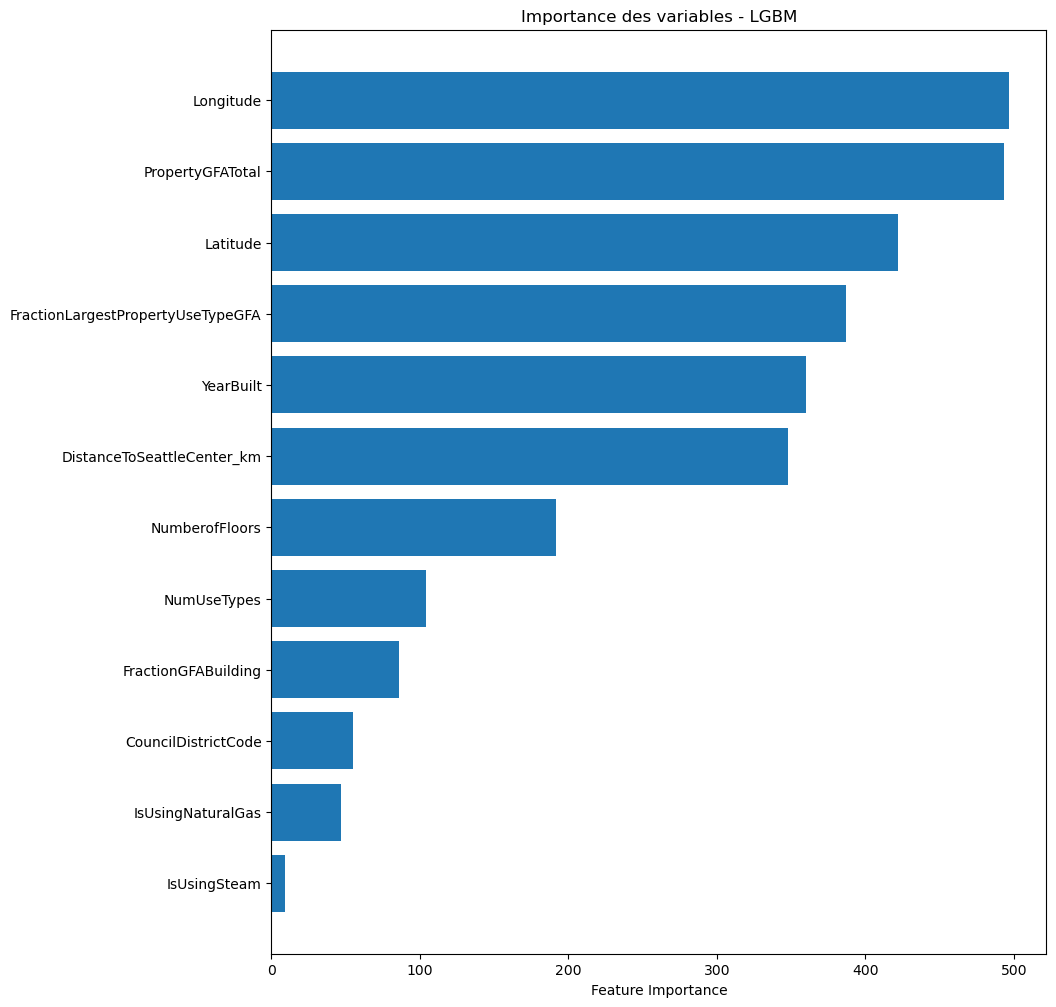

In [43]:
# Feature Importance

importances = best_model.feature_importances_
features = X_train_energy.columns

sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 12))
plt.barh(range(len(features)), importances[sorted_idx])
plt.yticks(range(len(features)), features[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Importance des variables - LGBM")
plt.show()

In [44]:
import shap

rf_model = best_model.regressor if hasattr(best_model, "regressor") else best_model

# Explainer pour modèles Tree-based (optimisé, rapide)
explainer = shap.TreeExplainer(rf_model)

# Calcul des SHAP values sur le training set
shap_values = explainer.shap_values(X_train_energy)

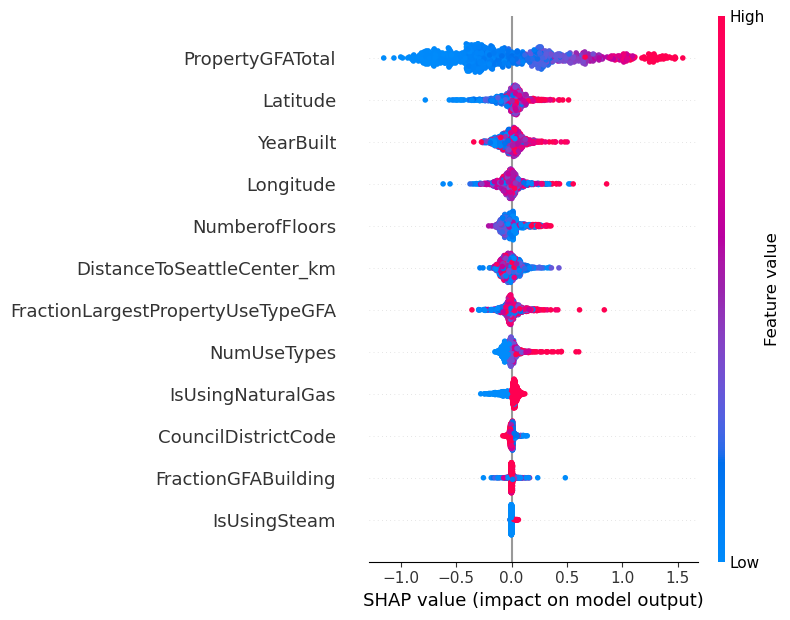

In [45]:
shap.summary_plot(shap_values, X_train_energy)